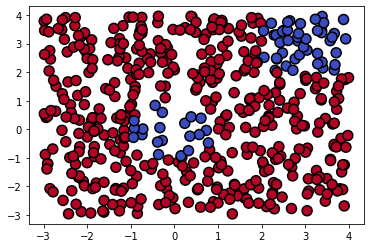

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs, make_circles
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

RANDOM_SEED = 139

def get_labels(data):
    labels = []
    for idx, item in enumerate(data):
        if item[0]**2 + item[1]**2 < 1:
            labels.append(0)
        elif item[0] > 2 and item[1] > 2:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(labels)

N = 500
train_data = 7 * np.random.random_sample((N,2)) - np.array([3,3])

train_labels = get_labels(train_data)

# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

shallow_rf = RandomForestClassifier(n_estimators=5, max_depth=100, n_jobs=-1, 
                                    random_state=RANDOM_SEED)
deep_rf = RandomForestClassifier(n_estimators=5, max_depth=6, n_jobs=-1, 
                                 random_state=RANDOM_SEED)

# training the tree
shallow_rf.fit(train_data, train_labels)
deep_rf.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted_shallow = shallow_rf.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
predicted_deep = deep_rf.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)

plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

<ipython-input-2-9fd3e2ad3627>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[0].pcolormesh(xx, yy, predicted_shallow, cmap='coolwarm')
<ipython-input-2-9fd3e2ad3627>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[1].pcolormesh(xx, yy, predicted_deep, cmap='coolwarm')


Text(0.5, 1.0, 'Deep Random Forest')

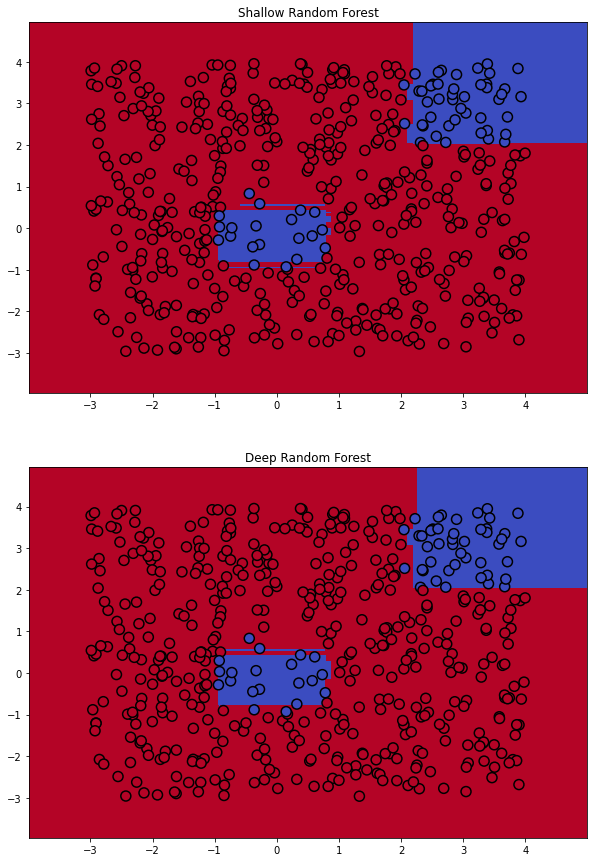

In [2]:
fig, ax = plt.subplots(2, 1, figsize=(10,15))

ax[0].pcolormesh(xx, yy, predicted_shallow, cmap='coolwarm')
ax[0].scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);
ax[0].set_title('Shallow Random Forest')

ax[1].pcolormesh(xx, yy, predicted_deep, cmap='coolwarm')
ax[1].scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);
ax[1].set_title('Deep Random Forest')

In [3]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/DAAG/spam7.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4601 non-null   int64  
 1   crl.tot     4601 non-null   int64  
 2   dollar      4601 non-null   float64
 3   bang        4601 non-null   float64
 4   money       4601 non-null   float64
 5   n000        4601 non-null   float64
 6   make        4601 non-null   float64
 7   yesno       4601 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 287.7+ KB


In [4]:
df['spam'] = df.yesno.apply(lambda x: 1 if x == 'y' else 0)
df.drop(df.iloc[:, [0, 7]], axis=1, inplace=True)

In [5]:
X = df.iloc[:, :-1]
y = df['spam']
X.columns

Index(['crl.tot', 'dollar', 'bang', 'money', 'n000', 'make'], dtype='object')

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import PolynomialFeatures


#"""
# Добавим новые признаки, перемножив существующие признаки попарно
pf = PolynomialFeatures(interaction_only=True, include_bias=False)
poly_data = pf.fit_transform(X)
poly_cols = pf.get_feature_names(X.columns)
poly_cols = [x.replace(' ', '_') for x in poly_cols]

poly_X = pd.DataFrame(poly_data, columns=poly_cols)
#"""

X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.2, random_state=42)

gb_clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1, max_features=None, random_state=42)
gb_clf.fit(X_train, y_train)

gb_clf.score(X_test, y_test)

0.8653637350705755

In [7]:
gb_clf.feature_importances_

array([2.97159411e-02, 1.40769896e-01, 4.25720650e-02, 6.09020185e-03,
       2.47773348e-02, 1.16642741e-03, 8.67921568e-03, 6.14877389e-01,
       4.02447573e-02, 1.36581568e-03, 6.53881797e-03, 6.05665814e-02,
       7.22153860e-03, 3.42199906e-03, 1.69411057e-03, 6.46902133e-03,
       1.17577385e-03, 1.96526554e-03, 2.65508758e-05, 0.00000000e+00,
       6.61296634e-04])

In [8]:
from sklearn.model_selection import GridSearchCV

mdl = GradientBoostingClassifier(random_state=42)
param_grid = {'learning_rate':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
              'n_estimators':[100, 250, 500, 750, 1000, 1250, 1500, 1750]}
gs = GridSearchCV(estimator=mdl, scoring='accuracy', n_jobs=-1, cv=5, param_grid=param_grid)

gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500,
                                          1750]},
             scoring='accuracy')

In [9]:
gs.best_score_

0.8836956521739131

In [10]:
gs.best_params_

{'learning_rate': 0.01, 'n_estimators': 1250}

In [11]:
mdl2 = GradientBoostingClassifier(random_state=42, learning_rate=0.01, n_estimators=1250)
param_grid = {'max_depth':list(range(5, 16))}
gs2 = GridSearchCV(estimator=mdl2, scoring='accuracy', n_jobs=-1, cv=5, param_grid=param_grid)

gs2.fit(X_train, y_train)
gs2.best_params_, gs.best_score_

({'max_depth': 5}, 0.8836956521739131)

In [12]:
def AdaBoost_scratch(X, y, M=10, learning_rate = 1):
    # инициалиазция служебных переменных
    N = len(y)
    estimator_list, y_predict_list, estimator_error_list, estimator_weight_list, sample_weight_list = [], [],[],[],[]

    # инициализация весов
    sample_weight = np.ones(N) / N
    sample_weight_list.append(sample_weight.copy())

    # цикл по длине М
    for m in range(M):   

        # обучим базовую модель и получим предсказание
        estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2)
        estimator.fit(X, y, sample_weight=sample_weight)
        y_predict = estimator.predict(X)

        # Маска для ошибок классификации
        incorrect = (y_predict != y)

        # Оцениваем ошибку
        estimator_error = (sample_weight * incorrect).sum()
        print(f'{estimator_error = }')
        
        # Вычисляем вес нового алгоритма
        estimator_weight = learning_rate*np.log(1/estimator_error - estimator_error)

        # Получаем новые веса объектов
        sample_weight *= np.exp(estimator_weight * incorrect * ((sample_weight > 0) | (estimator_weight < 0)))

        # Сохраяем результаты данной итерации
        estimator_list.append(estimator)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(estimator_error.copy())
        estimator_weight_list.append(estimator_weight.copy())
        sample_weight_list.append(sample_weight.copy())
        


    # Для удобства переведем в numpy.array   
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)

    # Получим предсказания
    preds = (np.array([np.sign((y_predict_list[:,point] * estimator_weight_list).sum()) for point in range(N)]))
    print('Accuracy = ', (preds == y).sum() / N) 
    
    return estimator_list, estimator_weight_list, sample_weight_list

estimator_list, estimator_weight_list, sample_weight_list  = AdaBoost_scratch(poly_X, y, M=10, learning_rate=0.001)


estimator_error = 0.17713540534666378
estimator_error = 0.17743660729951016
estimator_error = 0.17773799984947203
estimator_error = 0.1780395825029319
estimator_error = 0.17834135476547466
estimator_error = 0.1786433161418903
estimator_error = 0.17894546613617593
estimator_error = 0.17924780425153805
estimator_error = 0.17955032999039505
estimator_error = 0.17985304285437953
Accuracy =  0.8228645946533363


In [13]:
import pandas as pd
import numpy as np

from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier,
                              RandomForestClassifier, ExtraTreesClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.datasets import load_digits

from tqdm import tqdm

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats.distributions import randint

In [14]:
dataset = load_digits()
X, y = dataset['data'], dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


In [15]:
def compute_meta_feature(clf, X_train, X_test, y_train, cv):
    """
    Эта функция подсчитывает признаки для мета-классификатора. 
    Они являются вероятностями классов при решении задачи многоклассовой классификации.
    
    :arg clf: классификатор
    :args X_train, y_train: обучающая выборка
    :arg X_test: признаки тестовой выборки
    :arg cv: класс, генерирующий фолды (KFold)
    
    :returns X_meta_train, X_meta_test: новые признаки для обучающей и тестовой выборок
    """
    n_classes = len(np.unique(y_train))
    X_meta_train = np.zeros((len(X_train), n_classes), dtype=np.float32)
    for train_fold_index, predict_fold_index in cv.split(X_train):
        X_fold_train, X_fold_predict = X_train[train_fold_index], X_train[predict_fold_index]
        y_fold_train = y_train[train_fold_index]

        folded_clf = clone(clf)
        folded_clf.fit(X_fold_train, y_fold_train)

        X_meta_train[predict_fold_index] = folded_clf.predict_proba(X_fold_predict)

    meta_clf = clone(clf)
    meta_clf.fit(X_train, y_train)

    X_meta_test = meta_clf.predict_proba(X_test)

    return X_meta_train, X_meta_test


In [16]:
def compute_meta_feature_mean(clf, X_train, X_test, y_train, cv):
    """
    Эта функция подсчитывает признаки для мета-классификатора. 
    Они являются вероятностями классов при решении задачи многоклассовой классификации.

    :arg clf: классификатор
    :args X_train, y_train: обучающая выборка
    :arg X_test: признаки тестовой выборки
    :arg cv: класс, генерирующий фолды (KFold)

    :returns X_meta_train, X_meta_test: новые признаки для обучающей и тестовой выборок
    """
    n_classes = len(np.unique(y_train))
    X_meta_train = np.zeros((len(X_train), n_classes), dtype=np.float32)
    X_meta_test = np.zeros((len(X_test), n_classes), dtype=np.float32)
    n = int()
    
    for train_fold_index, predict_fold_index in cv.split(X_train):
        X_fold_train, X_fold_predict = X_train[train_fold_index], X_train[predict_fold_index]
        y_fold_train = y_train[train_fold_index]

        folded_clf = clone(clf)
        folded_clf.fit(X_fold_train, y_fold_train)

        X_meta_train[predict_fold_index] = folded_clf.predict_proba(X_fold_predict)
        X_meta_test += folded_clf.predict_proba(X_test)
        n += 1
    
    meta_clf = clone(clf)
    meta_clf.fit(X_train, y_train)

    X_meta_test /= n

    return X_meta_train, X_meta_test

# 6.6.2 и далее

In [17]:
def compute_meta_feature(clf, X_train, X_test, y_train, cv):
    
    n_classes = len(np.unique(y_train))
    X_meta_train = np.zeros((len(y_train), n_classes), dtype=np.float32)

    splits = cv.split(X_train)
    for train_fold_index, predict_fold_index in splits:
        X_fold_train, X_fold_predict = X_train[train_fold_index], X_train[predict_fold_index]
        y_fold_train = y_train[train_fold_index]
        
        folded_clf = clone(clf)
        folded_clf.fit(X_fold_train, y_fold_train)
        
        X_meta_train[predict_fold_index] = folded_clf.predict_proba(X_fold_predict)
    
    meta_clf = clone(clf)
    meta_clf.fit(X_train, y_train)
    
    X_meta_test = meta_clf.predict_proba(X_test)
    
    return X_meta_train, X_meta_test

def generate_meta_features(classifiers, X_train, X_test, y_train, cv):
   
    features = [
        compute_meta_feature(clf, X_train, X_test, y_train, cv)
        for clf in tqdm(classifiers)
    ]
    
    stacked_features_train = np.hstack([
        features_train for features_train, features_test in features
    ])

    stacked_features_test = np.hstack([
        features_test for features_train, features_test in features
    ])
    
    return stacked_features_train, stacked_features_test

cv = KFold(n_splits=10, shuffle=True, random_state=42)

def compute_metric(clf, X_train=X_train, y_train=y_train, X_test=X_test):
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    return np.round(f1_score(y_test, y_test_pred, average='macro'), 6)



In [22]:
clfs_list = [
    LogisticRegression(penalty='l1', C=0.001, solver='saga', max_iter=2000, random_state=42, multi_class='ovr'),
    LogisticRegression(penalty='l2', C=0.001, solver='saga', max_iter=2000, random_state=42, multi_class='multinomial'),
    RandomForestClassifier(n_estimators=300, random_state=42),
    GradientBoostingClassifier(n_estimators=200, random_state=42)
]
meta_clf = LogisticRegression(penalty='none', random_state=42)

In [23]:
dataset = load_digits()
X, y = dataset['data'], dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

cv = KFold(n_splits=10, shuffle=True, random_state=42)

In [24]:
stacked_features_train, stacked_features_test = generate_meta_features(clfs_list, X_train, X_test, y_train, cv)

100%|██████████| 4/4 [02:21<00:00, 35.31s/it]


In [25]:
meta_clf.fit(stacked_features_train, y_train)
compute_metric(meta_clf, stacked_features_train, y_train, stacked_features_test)

0.981069

In [29]:
clfs_list2 = [
    RandomForestClassifier(n_estimators=300, random_state=42),
    ExtraTreesClassifier(n_estimators=200, n_jobs=-1, random_state=42)
]
meta_clf2 = LogisticRegression(penalty='none', random_state=42)

In [30]:
dataset = load_digits()
X, y = dataset['data'], dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

cv = KFold(n_splits=10, shuffle=True, random_state=42)

In [31]:
stacked_features_train, stacked_features_test = generate_meta_features(clfs_list2, X_train, X_test, y_train, cv)
meta_clf2.fit(stacked_features_train, y_train)
compute_metric(meta_clf2, stacked_features_train, y_train, stacked_features_test)

100%|██████████| 2/2 [00:10<00:00,  5.01s/it]


0.982421

In [32]:
clfs_list3 = [
    KNeighborsClassifier(),
    ExtraTreesClassifier(n_estimators=300, n_jobs=-1, random_state=42)
]
meta_clf3 = LogisticRegression(penalty='none', random_state=42)

In [33]:
dataset = load_digits()
X, y = dataset['data'], dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

cv = KFold(n_splits=10, shuffle=True, random_state=42)

In [34]:
stacked_features_train, stacked_features_test = generate_meta_features(clfs_list3, X_train, X_test, y_train, cv)
meta_clf3.fit(stacked_features_train, y_train)
compute_metric(meta_clf3, stacked_features_train, y_train, stacked_features_test)

100%|██████████| 2/2 [00:04<00:00,  2.12s/it]
/home/pavlk/APPS/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/pavlk/APPS/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

0.989904

In [35]:
clfs_list4 = [
    LogisticRegression(penalty='l1', C=0.001, solver='saga', max_iter=2000, random_state=42, multi_class='ovr'),
    KNeighborsClassifier(),
    ExtraTreesClassifier(n_estimators=300, n_jobs=-1, random_state=42),
    AdaBoostClassifier(random_state=42)
]
meta_clf4 = LogisticRegression(penalty='none', random_state=42)

In [36]:
dataset = load_digits()
X, y = dataset['data'], dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

cv = KFold(n_splits=10, shuffle=True, random_state=42)

In [37]:
stacked_features_train, stacked_features_test = generate_meta_features(clfs_list4, X_train, X_test, y_train, cv)
meta_clf4.fit(stacked_features_train, y_train)
compute_metric(meta_clf4, stacked_features_train, y_train, stacked_features_test)

100%|██████████| 4/4 [00:39<00:00,  9.94s/it]


0.987404

In [53]:
clfs_list5 = [
    RandomForestClassifier(n_estimators=300, random_state=42),
    ExtraTreesClassifier(n_estimators=300, n_jobs=-1, random_state=42)
]
meta_clf5 = LogisticRegression(penalty='none', random_state=42)

In [54]:
dataset = load_digits()
X, y = dataset['data'], dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [55]:
def compute_meta_feature(clf, X_train, X_test, y_train, cv):
    
    n_classes = len(np.unique(y_train))
    X_meta_train = np.zeros((len(y_train), n_classes), dtype=np.float32)

    splits = cv.split(X_train, y_train)
    for train_fold_index, predict_fold_index in splits:
        X_fold_train, X_fold_predict = X_train[train_fold_index], X_train[predict_fold_index]
        y_fold_train = y_train[train_fold_index]
        
        folded_clf = clone(clf)
        folded_clf.fit(X_fold_train, y_fold_train)
        
        X_meta_train[predict_fold_index] = folded_clf.predict_proba(X_fold_predict)
    
    meta_clf = clone(clf)
    meta_clf.fit(X_train, y_train)
    
    X_meta_test = meta_clf.predict_proba(X_test)
    
    return X_meta_train, X_meta_test

In [56]:
stacked_features_train, stacked_features_test = generate_meta_features(clfs_list5, X_train, X_test, y_train, cv)
meta_clf5.fit(stacked_features_train, y_train)
compute_metric(meta_clf5, stacked_features_train, y_train, stacked_features_test)



  0%|          | 0/2 [00:00<?, ?it/s]

 50%|█████     | 1/2 [00:07<00:07,  7.12s/it]

100%|██████████| 2/2 [00:11<00:00,  5.56s/it]


0.983918

# 6.6.3

In [59]:
def compute_meta_feature(clf, X_train, X_test, y_train, cv):
    
    n_classes = len(np.unique(y_train))
    X_meta_train = np.zeros((len(y_train), n_classes), dtype=np.float32)

    splits = cv.split(X_train, y_train)
    for train_fold_index, predict_fold_index in splits:
        X_fold_train, X_fold_predict = X_train[train_fold_index], X_train[predict_fold_index]
        y_fold_train = y_train[train_fold_index]
        
        folded_clf = clone(clf)
        folded_clf.fit(X_fold_train, y_fold_train)
        
        X_meta_train[predict_fold_index] = folded_clf.predict_proba(X_fold_predict)
    
    meta_clf = clone(clf)
    meta_clf.fit(X_train, y_train)
    
    X_meta_test = meta_clf.predict_proba(X_test)
    
    return X_meta_train, X_meta_test

In [57]:
clfs_list5 = [
    RandomForestClassifier(n_estimators=300, random_state=42),
    ExtraTreesClassifier(n_estimators=300, n_jobs=-1, random_state=42)
]
meta_clf5 = LogisticRegression(penalty='none', random_state=42)

In [58]:
dataset = load_digits()
X, y = dataset['data'], dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

In [60]:
stacked_features_train, stacked_features_test = generate_meta_features(clfs_list5, X_train, X_test, y_train, cv)
meta_clf5.fit(stacked_features_train, y_train)
compute_metric(meta_clf5, stacked_features_train, y_train, stacked_features_test)



  0%|          | 0/2 [00:00<?, ?it/s]

 50%|█████     | 1/2 [00:14<00:14, 14.28s/it]

100%|██████████| 2/2 [00:22<00:00, 11.14s/it]


0.984228

In [61]:
clfs_list5 = [
    RandomForestClassifier(n_estimators=300, random_state=42),
    ExtraTreesClassifier(n_estimators=300, n_jobs=-1, random_state=42)
]
meta_clf5 = RandomForestClassifier(random_state=42)

In [62]:
dataset = load_digits()
X, y = dataset['data'], dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [63]:
stacked_features_train, stacked_features_test = generate_meta_features(clfs_list5, X_train, X_test, y_train, cv)
meta_clf5.fit(stacked_features_train, y_train)
compute_metric(meta_clf5, stacked_features_train, y_train, stacked_features_test)

100%|██████████| 2/2 [00:06<00:00,  3.06s/it]


0.981661

In [66]:
clfs_list5 = [
    RandomForestClassifier(n_estimators=300, random_state=42),
    ExtraTreesClassifier(n_estimators=300, n_jobs=-1, random_state=42)
]
meta_clf5 = KNeighborsClassifier()

In [67]:
dataset = load_digits()
X, y = dataset['data'], dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [68]:
stacked_features_train, stacked_features_test = generate_meta_features(clfs_list5, X_train, X_test, y_train, cv)
meta_clf5.fit(stacked_features_train, y_train)
compute_metric(meta_clf5, stacked_features_train, y_train, stacked_features_test)

100%|██████████| 2/2 [00:05<00:00,  2.92s/it]


0.98417

In [69]:
clfs_list5 = [
    RandomForestClassifier(n_estimators=300, random_state=42),
    ExtraTreesClassifier(n_estimators=300, n_jobs=-1, random_state=42)
]
meta_clf5 = GradientBoostingClassifier(random_state=42)

In [70]:
dataset = load_digits()
X, y = dataset['data'], dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [71]:
stacked_features_train, stacked_features_test = generate_meta_features(clfs_list5, X_train, X_test, y_train, cv)
meta_clf5.fit(stacked_features_train, y_train)
compute_metric(meta_clf5, stacked_features_train, y_train, stacked_features_test)

100%|██████████| 2/2 [00:05<00:00,  2.96s/it]


0.984925

In [73]:
clfs_list5 = [
    RandomForestClassifier(n_estimators=300, max_depth=24, criterion='gini', random_state=42),
    ExtraTreesClassifier(n_estimators=300, n_jobs=-1, random_state=42)
]
meta_clf5 = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=42)

In [74]:
dataset = load_digits()
X, y = dataset['data'], dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [75]:
stacked_features_train, stacked_features_test = generate_meta_features(clfs_list5, X_train, X_test, y_train, cv)
meta_clf5.fit(stacked_features_train, y_train)
compute_metric(meta_clf5, stacked_features_train, y_train, stacked_features_test)

100%|██████████| 2/2 [00:03<00:00,  1.90s/it]


0.986498

In [100]:
c1 = RandomForestClassifier(n_estimators=300, max_depth=24, criterion='gini', random_state=42)
c2 = ExtraTreesClassifier(n_estimators=300, n_jobs=-1, random_state=42)
c3 = LogisticRegression(random_state=42)


In [101]:
dataset = load_digits()
X, y = dataset['data'], dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [102]:
predicts = list()
c1.fit(X_train, y_train)
y1 = c1.predict_proba(X_test)
predicts.append(y1)

c2.fit(X_train, y_train)
y2 = c2.predict_proba(X_test)
predicts.append(y2)

c3.fit(X_train, y_train)
y3 = c3.predict_proba(X_test)
predicts.append(y3)

/home/pavlk/APPS/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [103]:
y_pred = np.sum(predicts, axis=0).argmax(axis=1)
print(np.round(f1_score(y_test, y_pred, average='macro'), 6))

0.976259
